In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa

In [2]:
from scipy.io import wavfile

In [3]:
! pip install pydub

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 982kB/s ta 0:00:01
    100% |████████████████████████████████| 286kB 1.2MB/s ta 0:00:01
    100% |████████████████████████████████| 327kB 1.2MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 176kB/s ta 0:00:01
    100% |████████████████████████████████| 13.2MB 278kB/s ta 0:00:011    89% |████████████████████████████▌   | 11.7MB 29.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for librosa ... done
  Stored in directory: /Users/noorahmed/Library/Caches/pip/wheels/ce/49/68/87ba660f30e3977f0778e39ee2e944629cd37c2a0ce41f9ff1
  Running setup.py bdist_wheel for audioread ... done
  Stored in directory: /Users/noorahmed/Library/Caches/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... done
  Stored in directory: /Users/noorahmed/Library/Caches/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy
Yo

# Extracting Audio Chunks

In [4]:
from pydub import AudioSegment
from pydub.utils import db_to_float
from pydub.silence import split_on_silence
import wave

In [7]:
# Template Audio
file_handle = input()
template_raw_audio = AudioSegment.from_wav(file_handle)

../Data/hello1.wav


In [8]:
# Ringtone + Voice Raw Audio
file_handle = input()
mixed_raw_audio = AudioSegment.from_wav(file_handle)

../Data/hello1.wav


### Normalise both audio files

In [ ]:
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

sound = AudioSegment.from_file("yourAudio.m4a", "m4a")
normalized_sound = match_target_amplitude(sound, -20.0)
normalized_sound.export("nomrmalizedAudio.m4a", format="mp4")

In [15]:
# Splitting the audio based on silence
# These thresholds should be adaptive
threshold = -30
min_length = 200
templates = split_on_silence(template_raw_audio, min_silence_len=min_length, silence_thresh=threshold)
mixed = split_on_silence(mixed_raw_audio, min_silence_len=min_length, silence_thresh=threshold)

In [10]:
wav_file = wave.open(file_handle, 'r')

/anaconda/envs/p1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/anaconda/envs/p1/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


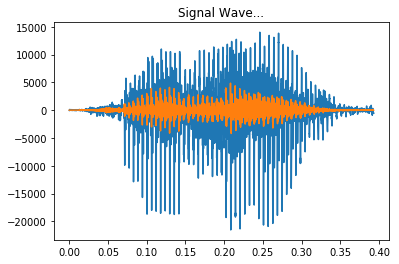

In [40]:
#Extract Raw Audio from Wav File
signal = np.fromstring(templates[0].raw_data, 'Int16')

#Split the data into channels 
channels = [[] for channel in range(wav_file.getnchannels())]
for index, datum in enumerate(signal):
    channels[index%len(channels)].append(datum)

#Get time from indices
fs = wav_file.getframerate()
Time = np.linspace(0, len(signal)/len(channels)/fs, num=len(signal)/len(channels))

#Plot
plt.figure(1)
plt.title('Signal Wave...')
for channel in channels:
    plt.plot(Time,channel)
plt.show()

# Template Matching

In [12]:
def cosineSimilarity(template_signal, audio_signal):
    sim = np.dot(template_signal, audio_signal)/(np.linalg.norm(template_signal) * np.linalg.norm(audio_signal))
    return sim

print(cosineSimilarity(signal, signal))
# Maybe not the best method

4.37986431426e-08


In [38]:
chroma_cens = librosa.feature.chroma_cens(signal)
plt.figure()
plt.subplot(1,1,1)
plt.plot(chroma_cens)
# librosa.display.specshow(chroma_cens, y_axis='chroma')
plt.title('chroma_cq')

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

In [14]:
chroma_cens

array([[ 0.09908841,  0.10281498,  0.10663234, ...,  0.07392498,
         0.07040188,  0.06632082],
       [ 0.04445393,  0.04842582,  0.0526237 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10594503,  0.10844133,  0.11081019, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.07519865,  0.07561915,  0.07588223, ...,  0.62463197,
         0.62969794,  0.63454478],
       [ 0.0943344 ,  0.0960497 ,  0.09740605, ...,  0.40035625,
         0.4094745 ,  0.41753186],
       [ 0.17838141,  0.18102441,  0.18328607, ...,  0.04672407,
         0.04350516,  0.03991634]])

# Source Seperation

In [42]:
from __future__ import print_function

import numpy as np
import scipy
import matplotlib.pyplot as plt

import sklearn.cluster

import librosa
import librosa.display

In [43]:
y, sr = librosa.load('../Data/hello1.wav')

/anaconda/envs/p1/lib/python3.6/site-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


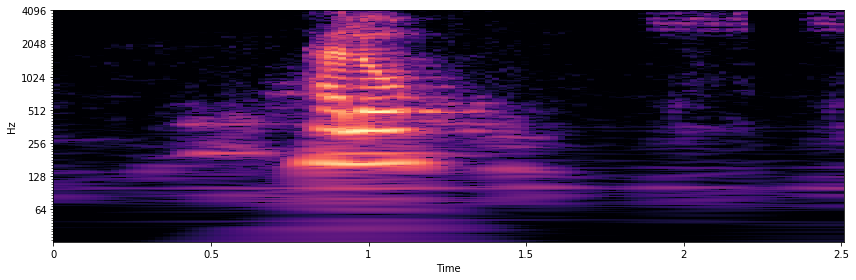

In [44]:
BINS_PER_OCTAVE = 12 * 3
N_OCTAVES = 7
C = librosa.amplitude_to_db(librosa.cqt(y=y, sr=sr,
                                        bins_per_octave=BINS_PER_OCTAVE,
                                        n_bins=N_OCTAVES * BINS_PER_OCTAVE),
                            ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(C, y_axis='cqt_hz', sr=sr,
                         bins_per_octave=BINS_PER_OCTAVE,
                         x_axis='time')
plt.tight_layout()

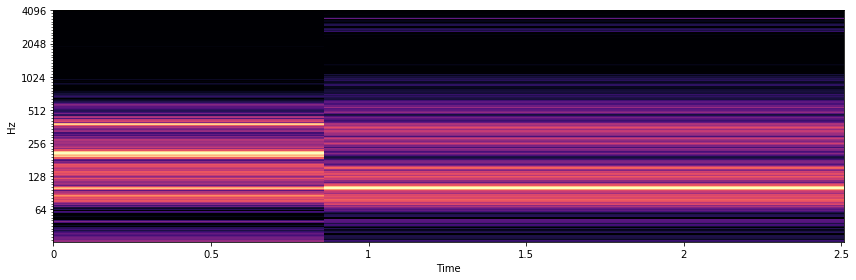

In [45]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, trim=False)
Csync = librosa.util.sync(C, beats, aggregate=np.median)

# For plotting purposes, we'll need the timing of the beats
# we fix_frames to include non-beat frames 0 and C.shape[1] (final frame)
beat_times = librosa.frames_to_time(librosa.util.fix_frames(beats,
                                                            x_min=0,
                                                            x_max=C.shape[1]),
                                    sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.specshow(Csync, bins_per_octave=12*3,
                         y_axis='cqt_hz', x_axis='time',
                         x_coords=beat_times)
plt.tight_layout()

In [49]:
R = librosa.segment.recurrence_matrix(Csync, width=1, mode='affinity', sym=True)

# Enhance diagonals with a median filter (Equation 2)
df = librosa.segment.timelag_filter(scipy.ndimage.median_filter)
Rf = df(R, size=(1, 7))

In [50]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)
Msync = librosa.util.sync(mfcc, beats)

path_distance = np.sum(np.diff(Msync, axis=1)**2, axis=0)
sigma = np.median(path_distance)
path_sim = np.exp(-path_distance / sigma)

R_path = np.diag(path_sim, k=1) + np.diag(path_sim, k=-1)

In [51]:
deg_path = np.sum(R_path, axis=1)
deg_rec = np.sum(Rf, axis=1)

mu = deg_path.dot(deg_path + deg_rec) / np.sum((deg_path + deg_rec)**2)

A = mu * Rf + (1 - mu) * R_path

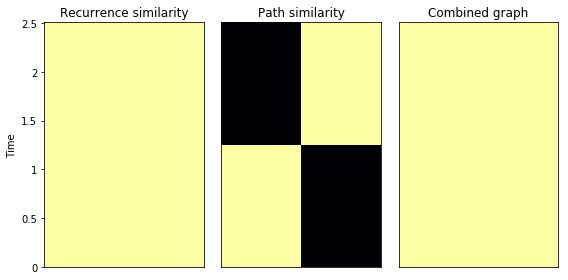

In [52]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
librosa.display.specshow(Rf, cmap='inferno_r', y_axis='time',
                         y_coords=beat_times)
plt.title('Recurrence similarity')
plt.subplot(1, 3, 2)
librosa.display.specshow(R_path, cmap='inferno_r')
plt.title('Path similarity')
plt.subplot(1, 3, 3)
librosa.display.specshow(A, cmap='inferno_r')
plt.title('Combined graph')
plt.tight_layout()

In [ ]:
L = scipy.sparse.csgraph.laplacian(A, normed=True)


# and its spectral decomposition
evals, evecs = scipy.linalg.eigh(L)


# We can clean this up further with a median filter.
# This can help smooth over small discontinuities
evecs = scipy.ndimage.median_filter(evecs, size=(9, 1))


# cumulative normalization is needed for symmetric normalize laplacian eigenvectors
Cnorm = np.cumsum(evecs**2, axis=1)**0.5

# If we want k clusters, use the first k normalized eigenvectors.
# Fun exercise: see how the segmentation changes as you vary k

k = 5

X = evecs[:, :k] / Cnorm[:, k-1:k]


# Plot the resulting representation (Figure 1, center and right)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
librosa.display.specshow(Rf, cmap='inferno_r')
plt.title('Recurrence matrix')

plt.subplot(1, 2, 1)
librosa.display.specshow(X,
                         y_axis='time',
                         y_coords=beat_times)
plt.title('Structure components')
plt.tight_layout()

KM = sklearn.cluster.KMeans(n_clusters=k)

seg_ids = KM.fit_predict(X)


# and plot the results
plt.figure(figsize=(12, 4))
colors = plt.get_cmap('Paired', k)

plt.subplot(1, 3, 2)
librosa.display.specshow(Rf, cmap='inferno_r')
plt.title('Recurrence matrix')
plt.subplot(1, 3, 1)
librosa.display.specshow(X,
                         y_axis='time',
                         y_coords=beat_times)
plt.title('Structure components')
plt.subplot(1, 3, 3)
librosa.display.specshow(np.atleast_2d(seg_ids).T, cmap=colors)
plt.title('Estimated segments')
plt.colorbar(ticks=range(k))
plt.tight_layout()

bound_beats = 1 + np.flatnonzero(seg_ids[:-1] != seg_ids[1:])

# Count beat 0 as a boundary
bound_beats = librosa.util.fix_frames(bound_beats, x_min=0)

# Compute the segment label for each boundary
bound_segs = list(seg_ids[bound_beats])

# Convert beat indices to frames
bound_frames = beats[bound_beats]

# Make sure we cover to the end of the track
bound_frames = librosa.util.fix_frames(bound_frames,
                                       x_min=None,
                                       x_max=C.shape[1]-1)

# sphinx_gallery_thumbnail_number = 5

import matplotlib.patches as patches
plt.figure(figsize=(12, 4))

bound_times = librosa.frames_to_time(bound_frames)
freqs = librosa.cqt_frequencies(n_bins=C.shape[0],
                                fmin=librosa.note_to_hz('C1'),
                                bins_per_octave=BINS_PER_OCTAVE)

librosa.display.specshow(C, y_axis='cqt_hz', sr=sr,
                         bins_per_octave=BINS_PER_OCTAVE,
                         x_axis='time')
ax = plt.gca()

for interval, label in zip(zip(bound_times, bound_times[1:]), bound_segs):
    ax.add_patch(patches.Rectangle((interval[0], freqs[0]),
                                   interval[1] - interval[0],
                                   freqs[-1],
                                   facecolor=colors(label),
                                   alpha=0.50))

plt.tight_layout()
plt.show()

